# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# lOADING THE DATASET
df = pd.read_csv("C:\Ranga Folder\EDU\Data Analytics\GUVI\Final Project\Customer Conversion Prediction\Customer Conversion Prediction.csv")

In [3]:
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


## Data Cleaning :

### 1. Identifying if there is Null values and checking if all the data types are correct

In [4]:
print('DataFrame Shape:',df.shape,'\n')
df.info()

DataFrame Shape: (45211, 11) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


##### Notes from above output
##### 1. From the above output it is clear that there is no Null values but there are some unknown values in the data set
##### 2. All the data types of the features and Target are correct except for 'mon' feature. We need to Lable it as Number

#### 1.1 Correcting the datatype or labeling the month column (Coverting 'mon' feature as number):

In [5]:
mon_unique = df.mon.unique()
mon_dict = {'mon':['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
            'Mon_No':[i for i in range (1,13) ]}
mon_dict_df = pd.DataFrame(mon_dict) 
df = df.merge(mon_dict_df, on='mon')
df = df.drop('mon',axis = 1)


In [6]:
df.head(5)

,age,job,marital,education_qual,call_type,day,dur,num_calls,prev_outcome,y,Mon_No
0,58,management,married,tertiary,unknown,5,261,1,unknown,no,5
1,44,technician,single,secondary,unknown,5,151,1,unknown,no,5
2,33,entrepreneur,married,secondary,unknown,5,76,1,unknown,no,5
3,47,blue-collar,married,unknown,unknown,5,92,1,unknown,no,5
4,33,unknown,single,unknown,unknown,5,198,1,unknown,no,5


In [7]:
# Spliting up the Catagorical & Continious Columns
Cat_Col = ['job','marital','education_qual','call_type','prev_outcome','y']
Cont_Col = ['age','day','Mon_No','num_calls','dur']
Cat_Col_DF = df[Cat_Col]
Cont_Col_DF = df[Cont_Col]


### 2.Outliers Correction:

In [8]:
Cont_Col_DF.describe()

,age,day,Mon_No,num_calls,dur
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,6.144655,2.763841,258.163080
std,10.618762,8.322476,2.408034,3.098021,257.527812
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,33.000000,8.000000,5.000000,1.000000,103.000000
50%,39.000000,16.000000,6.000000,2.000000,180.000000
75%,48.000000,21.000000,8.000000,3.000000,319.000000
max,95.000000,31.000000,12.000000,63.000000,4918.000000


##### There are outliers in the dataset in " age, num_calls and dur"  that needs to be treated

In [9]:
Cont_Col_DF['age'].quantile(.75)

48.0

In [10]:
Ftrs = ['age','num_calls','dur']
Outliers_Dic = {'Features':Ftrs,'Min':[ df[i].min() for i in Ftrs],
               'Max':[df[i].max() for i in Ftrs],'Q1' : [df[i].quantile(.25) for i in Ftrs  ],
               'Q3' : [df[i].quantile(.75) for i in Ftrs  ],
               'mean':[df[i].mean() for i in Ftrs], 'median':[df[i].median() for i in Ftrs] }
#print(Outliers_Dic)
Outliers_DF = pd.DataFrame(Outliers_Dic)
Outliers_DF['IQR'] = Outliers_DF['Q3'] - Outliers_DF['Q1']
Outliers_DF['Lower_Fence'] = Outliers_DF['Q1'] - (1.5 *  (Outliers_DF['IQR']))
Outliers_DF['Upper_Fence'] = Outliers_DF['Q3'] + (1.5 *  (Outliers_DF['IQR']))
Outliers_DF

,Features,Min,Max,Q1,Q3,mean,median,IQR,Lower_Fence,Upper_Fence
0,age,18,95,33.0,48.0,40.936210,39.0,15.0,10.5,70.5
1,num_calls,1,63,1.0,3.0,2.763841,2.0,2.0,-2.0,6.0
2,dur,0,4918,103.0,319.0,258.163080,180.0,216.0,-221.0,643.0


In [11]:
# Treating Age Outliers

df[df['age'] == 80]
# Treating the age greater than=80
df.age[df['age'] > 80] = 80
df[df['age'] > 80].head(5)

C:\Users\ranga\AppData\Local\Temp\ipykernel_20048\3622329250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.age[df['age'] > 80] = 80


,age,job,marital,education_qual,call_type,day,dur,num_calls,prev_outcome,y,Mon_No


In [12]:
# Treating 'dur' Outliers

df[df['dur'] > 1000].shape
df['dur'].loc[df['dur']>1000] = 1000
df['dur'].loc[df['dur']>1000]

C:\Users\ranga\AppData\Local\Temp\ipykernel_20048\3938811302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dur'].loc[df['dur']>1000] = 1000


Series([], Name: dur, dtype: int64)

In [13]:
# Treating 'num_calls' Outliers


df[df['num_calls'] > 10].shape
df['num_calls'].loc[df['num_calls']>10] = 10
df['num_calls'].loc[df['num_calls']>10].head(5)

C:\Users\ranga\AppData\Local\Temp\ipykernel_20048\4039941400.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_calls'].loc[df['num_calls']>10] = 10


Series([], Name: num_calls, dtype: int64)

### 3. Finding No of Unknowns in each Feature & Treating them

In [14]:
R_Cnt = df.shape[0]

Unknowns = []
Unknown_ratio = []
X_Dict = {'Feature':df.columns,'Unknown_Count':Unknowns,'% Missing Data':Unknown_ratio}


for i in df.columns:
    UnK = df[i].loc[df[i]=='unknown'].count()
    Ratio = round(UnK*100/R_Cnt,2)
    Unknowns.append(UnK)
    Unknown_ratio.append(Ratio)

In [15]:
X_DF = pd.DataFrame(X_Dict)
display(X_DF)

,Feature,Unknown_Count,% Missing Data
0,age,0,0.00
1,job,288,0.64
2,marital,0,0.00
3,education_qual,1857,4.11
4,call_type,13020,28.80
5,day,0,0.00
6,dur,0,0.00
7,num_calls,0,0.00
8,prev_outcome,36959,81.75
9,y,0,0.00


#####  There is 81.75 data points are missing in prev_outcome. It cannot filled. so, that feature should be dropped

In [16]:
# Dropping the prev_outcome
df = df.drop('prev_outcome',axis = 1)
df.head(5)

,age,job,marital,education_qual,call_type,day,dur,num_calls,y,Mon_No
0,58,management,married,tertiary,unknown,5,261,1,no,5
1,44,technician,single,secondary,unknown,5,151,1,no,5
2,33,entrepreneur,married,secondary,unknown,5,76,1,no,5
3,47,blue-collar,married,unknown,unknown,5,92,1,no,5
4,33,unknown,single,unknown,unknown,5,198,1,no,5


In [17]:
# Treating the call_type Feature

print (df.call_type.unique())
print('Telephone:',df[df['call_type'] == 'telephone'].shape[0])
print('cellular:',df[df['call_type'] == 'cellular'].shape[0])

['unknown' 'cellular' 'telephone']
Telephone: 2906
cellular: 29285


In [18]:
# Most of the calls are made to cellular. So filling the unknown using mode

df['call_type'].loc[df['call_type'] == 'unknown'] = 'cellular'

C:\Users\ranga\AppData\Local\Temp\ipykernel_20048\4051845234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call_type'].loc[df['call_type'] == 'unknown'] = 'cellular'


In [19]:
# Treating the education_qual Feature
print (df.education_qual.unique())
print('primary:',df[df['education_qual'] == 'primary'].shape[0])
print('secondary:',df[df['education_qual'] == 'secondary'].shape[0])
print('tertiary:',df[df['education_qual'] == 'tertiary'].shape[0])

['tertiary' 'secondary' 'unknown' 'primary']
primary: 6851
secondary: 23202
tertiary: 13301


In [20]:
# Finding educational_qual mode for each job
jobs = [i for i in df.job.unique()]
edu_qual_mode = {'Job': [i for i in df.job.unique()],
                'edu_mode':[df[(df['job'] == i)].education_qual.mode()[0] for i in jobs]}
edu_mode = pd.DataFrame(edu_qual_mode)
edu_mode

,Job,edu_mode
0,management,tertiary
1,technician,secondary
2,entrepreneur,tertiary
3,blue-collar,secondary
4,unknown,unknown
5,retired,secondary
6,admin.,secondary
7,services,secondary
8,self-employed,tertiary
9,unemployed,secondary


In [21]:
# Filling the unknown edu qual based on the above table

x = lambda x: edu_qual_mode['edu_mode'][edu_qual_mode['Job'].index(x)]
df['education_qual'].loc[df.education_qual =='unknown'] = df['job'].apply(lambda x: edu_qual_mode['edu_mode'][edu_qual_mode['Job'].index(x)]) 

C:\Users\ranga\AppData\Local\Temp\ipykernel_20048\3172004062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_qual'].loc[df.education_qual =='unknown'] = df['job'].apply(lambda x: edu_qual_mode['edu_mode'][edu_qual_mode['Job'].index(x)])


In [22]:
df['education_qual'].loc[df.education_qual =='unknown'].shape

(127,)

In [23]:
# Filling the balance by the std mode
df['education_qual'].loc[df.education_qual =='unknown'] = df['education_qual'].mode()[0]

C:\Users\ranga\AppData\Local\Temp\ipykernel_20048\939583469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_qual'].loc[df.education_qual =='unknown'] = df['education_qual'].mode()[0]


In [24]:
# Treating the job Feature
print (df.job.unique())
print('mode of job for age > 60:' ,df.job[(df.age > 60) ].mode()[0])

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
mode of job for age > 60: retired


In [25]:
#'Filling the unknowns in job as retired for age > 60'
df.job[(df.age>60) & (df.job=='unknown')] = 'retired'

C:\Users\ranga\AppData\Local\Temp\ipykernel_20048\3586745125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.job[(df.age>60) & (df.job=='unknown')] = 'retired'


In [26]:
df.job[(df.job=='unknown')].shape

(266,)

In [27]:
print('mode of job for age b/w 18 to 22 :' ,df.job[(df.age > 17) & (df.age < 23) ].mode()[0])

mode of job for age b/w 18 to 22 : student


In [28]:
#'Filling the unknowns in job as student for age > b/w 18 to 22
df.job[(df.age > 17) & (df.age < 23) & (df.job=='unknown') ] = 'student'
df.job[(df.job=='unknown')].shape

C:\Users\ranga\AppData\Local\Temp\ipykernel_20048\2729289734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.job[(df.age > 17) & (df.age < 23) & (df.job=='unknown') ] = 'student'


(266,)

In [29]:
# Finding job mode for each educational_qual
edu_qual = [i for i in df.education_qual.unique()]
job_mode = {'edu': edu_qual,
            'Job Mode':[df[(df['education_qual'] == i)].job.mode()[0] for i in edu_qual]}
print(job_mode)
job_mode_df = pd.DataFrame(job_mode)
job_mode_df

{'edu': ['tertiary', 'secondary', 'primary'], 'Job Mode': ['management', 'blue-collar', 'blue-collar']}


,edu,Job Mode
0,tertiary,management
1,secondary,blue-collar
2,primary,blue-collar


In [30]:
# Filling the unknown job based on the above table

x = lambda x: job_mode['Job Mode'][job_mode['edu'].index(x)]
df['job'].loc[df.job =='unknown'] = df['education_qual'].apply(lambda x: job_mode['Job Mode'][job_mode['edu'].index(x)]) 

C:\Users\ranga\AppData\Local\Temp\ipykernel_20048\4111584558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'].loc[df.job =='unknown'] = df['education_qual'].apply(lambda x: job_mode['Job Mode'][job_mode['edu'].index(x)])


In [31]:
df.job[(df.job=='unknown')].shape

(0,)

## Now the Data is cleaned and ready for EDA

In [32]:
df.head(5)

,age,job,marital,education_qual,call_type,day,dur,num_calls,y,Mon_No
0,58,management,married,tertiary,cellular,5,261,1,no,5
1,44,technician,single,secondary,cellular,5,151,1,no,5
2,33,entrepreneur,married,secondary,cellular,5,76,1,no,5
3,47,blue-collar,married,secondary,cellular,5,92,1,no,5
4,33,blue-collar,single,secondary,cellular,5,198,1,no,5


## Exploratory Data Analysis (EDA):

In [33]:
Age_Pivot = pd.pivot_table(df,index = 'age',columns='y',values ='marital',aggfunc = 'count',fill_value = 0)
Age_Pivot['Age'] = Age_Pivot.index
Age_Pivot.head(6)

y,no,yes,Age
age,,,
18,5,7,18
19,24,11,19
20,35,15,20
21,57,22,21
22,89,40,22
23,158,44,23


In [34]:
df.age.max()

80

In [35]:
Age_Pivot.columns

Index(['no', 'yes', 'Age'], dtype='object', name='y')

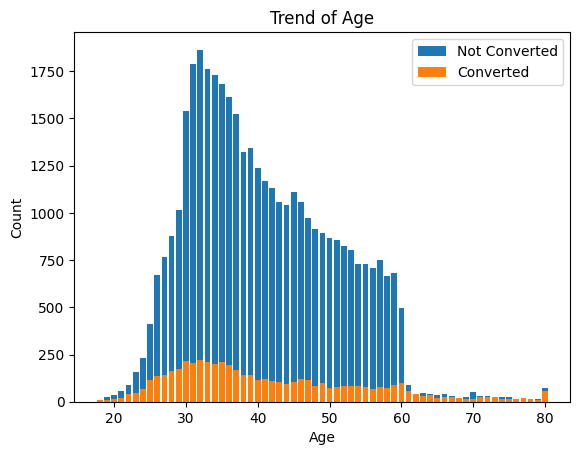

In [36]:
plt.bar(Age_Pivot.Age,Age_Pivot.no,label = 'Not Converted')
plt.bar(Age_Pivot.Age,Age_Pivot.yes,label = 'Converted')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Trend of Age')
plt.legend(loc='upper right')
plt.show()


1. From the above trend it is clear that the most targeted customer age group is between 25 to 60
2. The conversion count is also high to the customer age group between 25 to 60
3. The age group less than 25 and greater that 60 are likely to converted easily that the age group between 25 to 60

#### Clustering the Age droup into 3 for better analysis

In [37]:
Col = df.columns[1:-1]
Col

Index(['job', 'marital', 'education_qual', 'call_type', 'day', 'dur',
       'num_calls', 'y'],
      dtype='object')

In [38]:
#Creating age group

def agegroup(x): # Function to Group the age
    if x < 25 :
        return 'less than 25'
    elif x > 60:
        return 'greater than 60' 
    else:
        return 'b/w 25 and 60'

df['age_group'] = df['age'].apply(agegroup)

##### Exploring the Converted Customers

In [39]:
Converted_DF = df[df['y']=='yes']
Converted_DF.sort_values('age')

,age,job,marital,education_qual,call_type,day,dur,num_calls,y,Mon_No,age_group
31360,18,student,single,secondary,cellular,10,167,1,yes,8,less than 25
31503,18,student,single,primary,cellular,12,267,1,yes,8,less than 25
13565,18,student,single,secondary,cellular,5,443,4,yes,5,less than 25
44746,18,student,single,secondary,cellular,8,169,1,yes,9,less than 25
36766,18,student,single,primary,cellular,13,210,1,yes,11,less than 25
...,...,...,...,...,...,...,...,...,...,...,...
44913,80,entrepreneur,married,secondary,telephone,30,992,2,yes,9,greater than 60
37138,80,retired,married,secondary,telephone,28,679,1,yes,12,greater than 60
31907,80,retired,divorced,primary,telephone,26,189,1,yes,8,greater than 60
38535,80,retired,married,primary,cellular,28,151,1,yes,1,greater than 60


In [40]:
Features = ['job','marital','education_qual','call_type','Mon_No','num_calls','dur']
#Con = ['dur']

###### Creating Pivot Tables for analysing the converted Customers

In [41]:
def PivotTables (Ft): # Function to Create Pivot Tables
    if Ft != 'dur':
        Pivot_DF = pd.pivot_table(Converted_DF,index = Ft,columns=('age_group'),values ='y',aggfunc = 'count',fill_value = 0)
        return(Pivot_DF)
    else:
        Pivot_DF = pd.pivot_table(Converted_DF,index = 'age_group',columns=('y'),values ='dur',aggfunc = 'mean',fill_value = 0)
        return(Pivot_DF)

In [42]:
# Storing the Pivot Tables in List
PVNames=[]
PV_DF =[]
for F in Features:
    PVNames.append("Age_" + F)
    PV_DF.append(PivotTables (F))

PV = {"P_Names":PVNames,
      "PV_DF":PV_DF }



###### Creating BarPlots to Analyse the Converted Customers

C:\Users\ranga\AppData\Local\Temp\ipykernel_20048\1500604415.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[m,n].set_yticklabels(labels = j.index,rotation=0)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


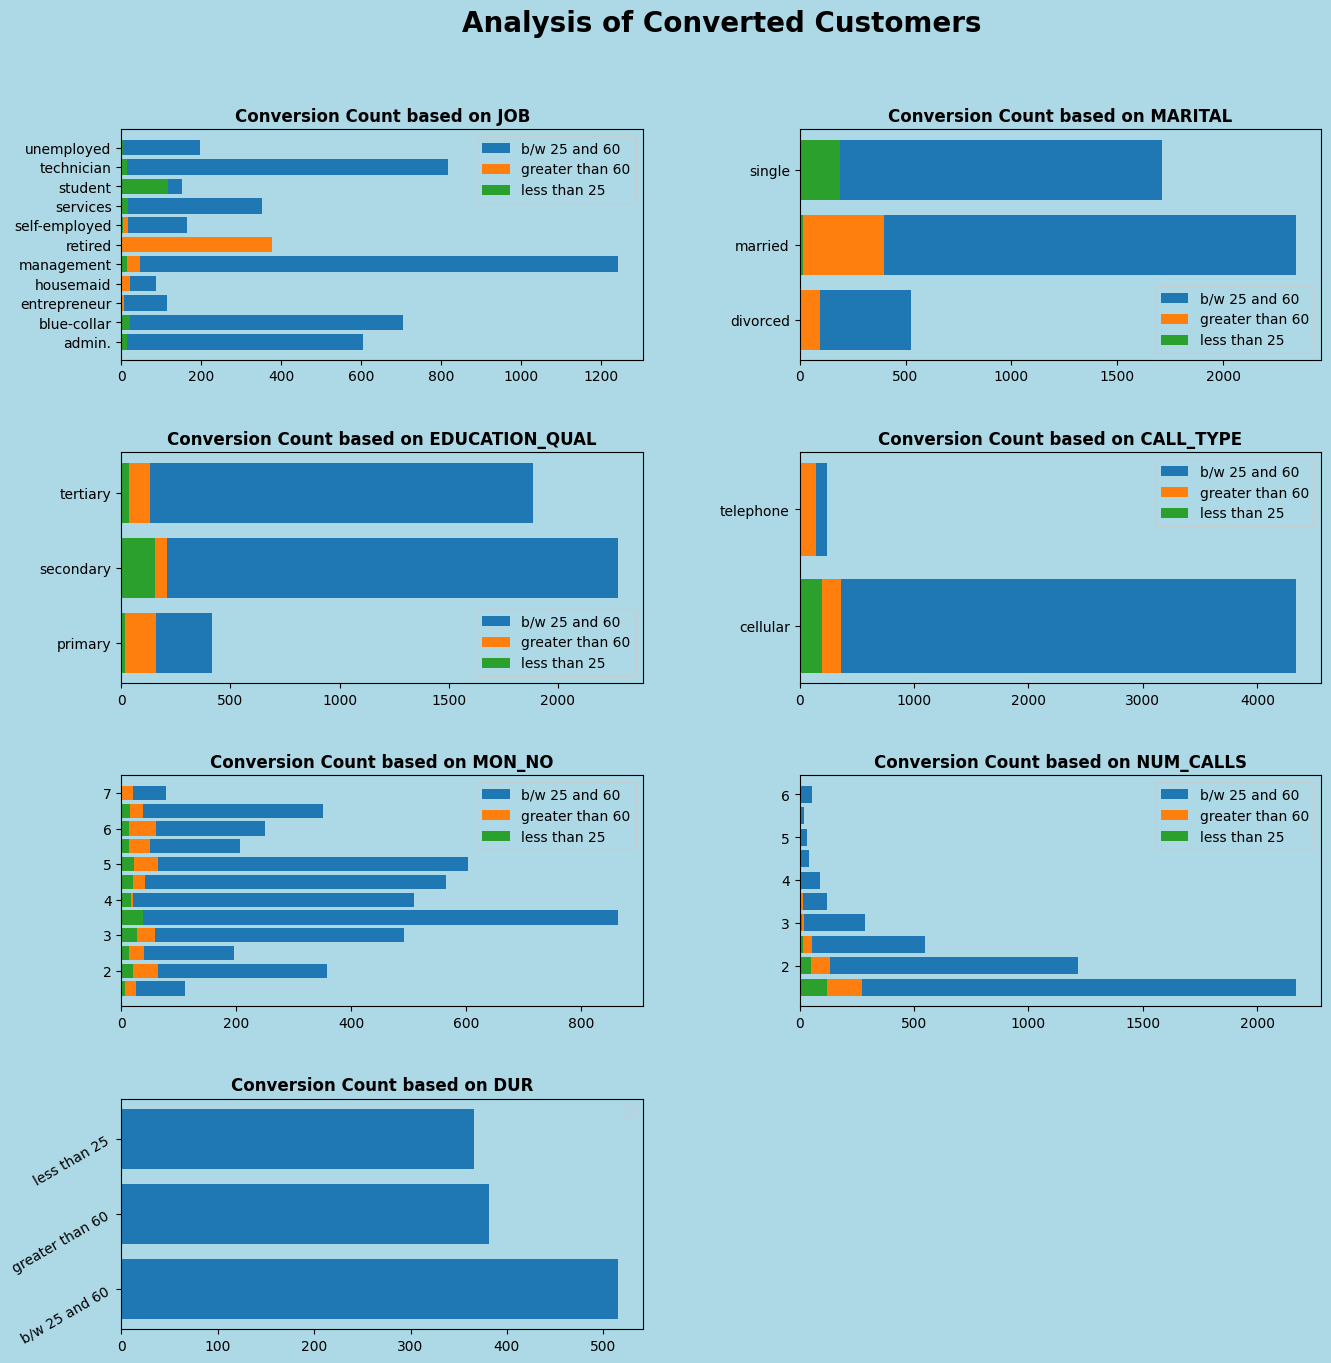

In [43]:
fig,ax = plt.subplots(4,2,figsize=(15, 15), facecolor='lightblue',frameon=True)
#fig,ax = generate_subplots(len(Features), row_wise=True)

fig.suptitle('Analysis of Converted Customers',fontsize = 20,fontweight ='bold')
m,n,k = 0,0,0
for i, j in zip(Features,PV_DF):
    
    if i != 'dur':
        ax[m,n].barh(j.index,j.iloc[:,0],label = 'b/w 25 and 60')
        ax[m,n].barh(j.index,j.iloc[:,1],label = 'greater than 60')
        ax[m,n].barh(j.index,j.iloc[:,2],label = 'less than 25')
    else:
        ax[m,n].barh(j.index,j.iloc[:,0])
    ax[m,n].legend(facecolor = 'lightblue')
    ax[m,n].set_facecolor('lightblue')
    #ax[m,n].set_xlabel('Conversion Count')
    #plt.xlabel('Conversion Count')
    #ax[m,n].set_ylabel(i.upper())
    ax[m,n].set_title('Conversion Count based on '+ i.upper(),fontweight ='bold')
    #ax[m,n].set_yticks(rotation=30)
    ax[m,n].set_yticklabels(labels = j.index,rotation=0)
    k = k + 15
    m = m + 1 if k % 2 == 0 else m 
    n = 0 if k % 2 == 0 else n + 1
fig.delaxes(ax[3][1])
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.4)
#plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.yticks(rotation=30)
plt.show()

#### Inferences from the above Plots:
###### *1. Job Catagory - 'Management' has Highest Conversion Count
###### *2. Marital Status - 'Marrried' has Highest Conversion Count
###### *3. Educational Qualification - 'Secondary' has Highest Conversion Count
###### *4. Call Type - 'Cellular' has Highest Conversion Count but it is the weakest feature since there is big count difference b/w the two call types
###### *5. May Month has the highest conversion Count
###### *6. Most of the customer converted in a Single Call
###### *7. Most Converted Customer age falls between 25 to 60
        
##### | There is high chance of conversion if all the above condtions are satisfied |
###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




## Label Encoding for Catagorical Variable & Target Variable

#### There are two types of Encoding - One hot & Label Encoding
##### * "Label encoding" is used for Binary Catagorical variable and Multilass ordinal(ie., if there is hierachical order) catagorical variable
##### * "One hot encoding" is used for Multilass Nominal catagorical variable
###### We have already applied Label Encoding for Month feature as it is Multiclass Ordinal Type variable


In [44]:
Bin_Cat = ['y','call_type'] # Label Encoding
Multi_Nom_Cat = ['job','marital','education_qual'] # One Hot Encoding

In [45]:
# Function for Label Encoding

def Label_Encode(Col,Data_Frame):
    Label_Name = 'Labeled_' + Col
    Unique_Val = Data_Frame[Col].unique()
    Data_Frame[Label_Name] = Data_Frame[Col].apply(lambda x: 1 if x == Unique_Val[1] else 0)
    Data_Frame = Data_Frame.drop(Col,axis = 1)
    return Data_Frame

In [46]:
# Function for One Hot Encoding

def One_hot_Encode(Col,Data_Frame):
    Unique_Val = Data_Frame[Col].unique()
    print(Unique_Val)
    for item in Unique_Val:
        Data_Frame[item.upper()] = Data_Frame[Col].apply(lambda x : 1 if x == item else 0 )
    Data_Frame = Data_Frame.drop(Col,axis = 1)
    return Data_Frame

In [47]:
# Label Encoding for Binary Catagorical Variable

for i in Bin_Cat:
    df = Label_Encode(i,df)

# One Hot  Encoding for Multiclass Nominal Variable

for i in Multi_Nom_Cat:
    df = One_hot_Encode(i,df)


['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'primary']


In [48]:
df = df.drop('age_group',axis = 1)
df.head(5)

,age,day,dur,num_calls,Mon_No,Labeled_y,Labeled_call_type,MANAGEMENT,TECHNICIAN,ENTREPRENEUR,...,SELF-EMPLOYED,UNEMPLOYED,HOUSEMAID,STUDENT,MARRIED,SINGLE,DIVORCED,TERTIARY,SECONDARY,PRIMARY
0,58,5,261,1,5,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,44,5,151,1,5,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,33,5,76,1,5,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,47,5,92,1,5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,33,5,198,1,5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### Spliting, Balancing & Scaling the Data Set

#### 1. Spliting the Data set to Training and Test Data set

In [49]:
X = df.drop('Labeled_y',axis = 1)
X = X.loc[:,X.columns[:]]# Features
Y = df['Labeled_y']

In [50]:
X

,age,day,dur,num_calls,Mon_No,Labeled_call_type,MANAGEMENT,TECHNICIAN,ENTREPRENEUR,BLUE-COLLAR,...,SELF-EMPLOYED,UNEMPLOYED,HOUSEMAID,STUDENT,MARRIED,SINGLE,DIVORCED,TERTIARY,SECONDARY,PRIMARY
0,58,5,261,1,5,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,44,5,151,1,5,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,33,5,76,1,5,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,47,5,92,1,5,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,33,5,198,1,5,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,67,29,245,3,9,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,28,29,845,1,9,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
45208,29,29,271,1,9,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
45209,43,30,175,1,9,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [51]:
# pip install -U scikit-learn

In [52]:
# Splitting the Data Set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 7)

In [236]:
X_test

array([[-0.69962447,  0.19866028, -0.41479907, ...,  1.82572657,
        -0.82479038, -0.31583783],
       [-0.69962447, -0.89266757, -0.97430776, ..., -0.54772714,
         1.21242927, -0.31583783],
       [-1.04094909, -0.40763297, -0.82327474, ..., -0.54772714,
         1.21242927, -0.31583783],
       ...,
       [-0.01697523, -1.01392622, -0.29465917, ...,  1.82572657,
        -0.82479038, -0.31583783],
       [-0.35829985,  0.07740163, -0.9811729 , ..., -0.54772714,
         1.21242927, -0.31583783],
       [ 1.00699863,  0.68369488, -0.61388805, ...,  1.82572657,
        -0.82479038, -0.31583783]])

#### 2. Balancing the Data Set

In [54]:
Tar_Cnt = df['Labeled_y'].groupby(df['Labeled_y']).count()
round(Tar_Cnt[0]/df.shape[0],2)

0.88

#### From the above output it is clear that 88 % of the data belongs to class 0 ('no'). This is an imbalanced data.
#### Problems of Imbalanced Data:
*1. Accuracy Evaluation Metric is bad metric for evaluating imbalanced Problem. We can use AUROC, F1 Score.

*2. All the Traditional ML aglorithms will not work well for imbalanced problem since the models are trained on inbalanced data it will focus on the majority class.

#### To counter this we need to balance the data using Centroid Clsustering (under sampling) and SMOTE technique (over Sampling)


In [55]:
#pip install imblearn

In [56]:
import imblearn
from imblearn.combine import SMOTEENN # Combination of oversampling and undersampling

smt = SMOTEENN(sampling_strategy='all')
X_smt, Y_smt = smt.fit_resample(X_train, Y_train)
X.shape,Y.shape,X_smt.shape,Y_smt.shape


((45211, 23), (45211,), (51761, 23), (51761,))

#### 3. Scaling the balanced data

In [57]:
# Scaling the Data set 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_smt)
X_smt = scaler.transform(X_smt)
X_test = scaler.transform(X_test)


## This is a Supervised Learning & Classification Task (Target is Catagorical)

## Model : Logistic Regression, KNN, Decision Tree, Random Forest, XG Boost

In [58]:
# Storing the Evaluation Score of all the Models in the Variable
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.metrics import roc_auc_score
Models = ['Logistic Reg','KNN','Decision tree','Random Forest', 'XG Boost']
AUROC_Score = []

### *1. Logistic Regression:
1. Scaling is not madatory.
2. Can find only linear Decsiion Boundries.
3. All Features must have linear Decsion Boundries.
4. It determines the predicted propability.(hence the name regression)
5. Applicable only for binary classification
6. Loss Jar - Log loss and its convex function.
7. Learning Jar - Gradient Descent will work well as Log loss is a convex Function.

In [59]:
# Fitting the Model

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=1)

LR.fit(X_smt, Y_smt) # Training the Model using Gradient descent Approach


LogisticRegression(random_state=1)

In [60]:
# Predicting the Result

LR_Pred = LR.predict(X_test)
LR_Score = round(roc_auc_score(Y_test, LR_Pred),3)
AUROC_Score.append(LR_Score)
LR_Score

0.712

### *2. KNN Algorithm:
1. Scaling is madatory since it uses Distance to predict.
2. K - Hyperparameter (We need to find the best value for K)
3. There is no Parameter for KNN.
4. Since there is no Parameter there is no Loss Jar & Learning Jar

In [61]:
from sklearn.neighbors import KNeighborsClassifier 
CV_Scores = []

#Hyper Parameter Tuning (Finding the best value for K)
for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i) #it will initialise the model with @neighbours as k 
  knn.fit(X_smt, Y_smt) # train the model
  CV_Scores.append(round(np.mean(cross_val_score(knn, X_smt, Y_smt, cv=10)),3))
K = CV_Scores.index(max(CV_Scores))+ 1
print("Optimal K Value : ",K,"with CV Score - ",max(CV_Scores))
print(CV_Scores)


Optimal K Value :  3 with CV Score -  0.941
[0.938, 0.939, 0.941, 0.939, 0.94, 0.937, 0.938, 0.936, 0.937, 0.934]


In [62]:
# Fitting the Model with best K value
knn = KNeighborsClassifier(n_neighbors=K) 
knn.fit(X_smt, Y_smt) # train the model


KNeighborsClassifier(n_neighbors=3)

In [185]:
KNN_pred = LR.predict(X_test)
KNN_Score = round(roc_auc_score(Y_test, KNN_pred),3)
AUROC_Score.append(KNN_Score)
KNN_Score

0.712

### *3. Decision Tree Algorithm:
1. Scaling is not madatory.
2. It is Binary Tree Model.
3. Loss Jar is Entropy (lower the entropy better the result)
4. depth of the Tree - Hyperparameter (We need to find the best value for depth)

In [111]:
# Finding Best value for depth
from sklearn.tree import DecisionTreeClassifier
# Hyperparametr tuning to get optimal depth
CV_Scores = []

for depth in range(1, 11):
  dt = DecisionTreeClassifier(max_depth=depth,random_state = 1) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_smt, Y_smt) # the model is trained
  valAccuracy = cross_val_score(dt, X_smt, Y_smt, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  CV_Scores.append(round(np.mean(valAccuracy),3))
D = CV_Scores.index(max(CV_Scores))+ 1
print("Optimal Depth Value : ",D,"with CV Score - ",max(CV_Scores))
print(CV_Scores)


Optimal Depth Value :  10 with CV Score -  0.919
[0.797, 0.797, 0.832, 0.847, 0.863, 0.874, 0.881, 0.903, 0.913, 0.919]


In [153]:
# Fitting the Model with best Depth value
DT = DecisionTreeClassifier(max_depth=D,random_state = 1) 
dt.fit(X_smt, Y_smt) # train the model


DecisionTreeClassifier(max_depth=10, random_state=1)

In [186]:
DT_Pred = dt.predict(X_test)
DT_Score = round(roc_auc_score(Y_test, DT_Pred),3)
AUROC_Score.append(DT_Score)
DT_Score

0.755

In [79]:
importance = dt.feature_importances_

list(zip(X_train.columns,importance)) # it calculates the feature importances based on IG

[('age', 0.032667720358162164),
 ('day', 0.03912333462808369),
 ('dur', 0.5679285033942197),
 ('num_calls', 0.03758774806336747),
 ('Mon_No', 0.05534288085573318),
 ('Labeled_call_type', 0.0011159108908180716),
 ('MANAGEMENT', 0.025469246516047),
 ('TECHNICIAN', 0.024063099965231042),
 ('ENTREPRENEUR', 0.014087545711635677),
 ('BLUE-COLLAR', 0.06558745404306718),
 ('RETIRED', 0.000298436189950584),
 ('ADMIN.', 0.022184001084248683),
 ('SERVICES', 0.0261984311510073),
 ('SELF-EMPLOYED', 0.010946813311039793),
 ('UNEMPLOYED', 0.009397198507324987),
 ('HOUSEMAID', 2.230884676504416e-05),
 ('STUDENT', 0.0001565689259237424),
 ('MARRIED', 0.00675163491251155),
 ('SINGLE', 0.0036996407977931806),
 ('DIVORCED', 0.0038111630364943893),
 ('TERTIARY', 0.019714434931999765),
 ('SECONDARY', 0.020079616953829132),
 ('PRIMARY', 0.01376630692474651)]

### Ensemble Technique Models: Random Forest, XG-Boost
##### (Models that combine multiple ML algorithms are called Ensemble Technique Models)
### *4. Random Forest Model:
1. It Combines Multiple Decision Tree Algorithm for better Result.
2. It Uses Concept of Bagging (Boot Strap Aggregation) to eliminate the dependency of the data in each sub Models.
3. Bagging Concept is the technique to Sample the data with Replacement.
4. By Bagging we will create Multiple Samples from the Training Data and Train Each Samples with a ML Model.
5. The Most repeated prediction of the Models is considered as the final Class 
6. Max depth is given as Log base 2 of No of Features & Max features = Sqrt of no of Features to conter the overfitting

In [188]:
from sklearn.ensemble import RandomForestClassifier
import math
RF_Depth = int(round(math.log2(len(X_train.columns)),0))
RF = RandomForestClassifier(n_estimators= 100, max_depth = RF_Depth, max_features='sqrt',random_state = 1)
RF.fit(X_smt, Y_smt) # Training
RF_Pred = RF.predict(X_test)
RF_Score = round(roc_auc_score(Y_test, RF_Pred),3)
AUROC_Score.append(RF_Score)
RF_Score


0.764

In [142]:
importance = RF.feature_importances_

list(zip(X_train.columns,importance)) # it calculates the feature importances based on IG

[('age', 0.02585453162333904),
 ('day', 0.00378997009131292),
 ('dur', 0.49728521475026655),
 ('num_calls', 0.048379447722644804),
 ('Mon_No', 0.01648139953992187),
 ('Labeled_call_type', 0.0014582546306967663),
 ('MANAGEMENT', 0.030602245106356684),
 ('TECHNICIAN', 0.03190126574049888),
 ('ENTREPRENEUR', 0.003515485205812674),
 ('BLUE-COLLAR', 0.05910239659884007),
 ('RETIRED', 0.0018596581869781983),
 ('ADMIN.', 0.02094667824894676),
 ('SERVICES', 0.01635336311513347),
 ('SELF-EMPLOYED', 0.0025490861676566753),
 ('UNEMPLOYED', 0.0009720964819845107),
 ('HOUSEMAID', 0.0021056600175458824),
 ('STUDENT', 0.00010256686248134481),
 ('MARRIED', 0.05283360247056419),
 ('SINGLE', 0.013658770012547679),
 ('DIVORCED', 0.0162706505238483),
 ('TERTIARY', 0.02338268514354097),
 ('SECONDARY', 0.07249809948181947),
 ('PRIMARY', 0.058096872277262505)]

### *5. XG-Boost Model:
1. It uses the concept of Gradient Boosting with multiple Decision Trees
2. In Boosting the models are created one after the other so that the models will improve over the previous model

Ref- https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390

In [159]:
pip install xgboost


     ---------------------------------------- 0.0/89.1 MB ? eta -:--:--
     ---------------------------------------- 1.1/89.1 MB 23.6 MB/s eta 0:00:04
     - -------------------------------------- 3.1/89.1 MB 33.1 MB/s eta 0:00:03
     -- ------------------------------------- 4.9/89.1 MB 35.3 MB/s eta 0:00:03
     -- ------------------------------------- 6.3/89.1 MB 36.6 MB/s eta 0:00:03
     --- ------------------------------------ 7.8/89.1 MB 33.1 MB/s eta 0:00:03
     ---- ----------------------------------- 9.4/89.1 MB 33.4 MB/s eta 0:00:03
     ---- ---------------------------------- 10.9/89.1 MB 34.4 MB/s eta 0:00:03
     ----- --------------------------------- 12.3/89.1 MB 32.7 MB/s eta 0:00:03
     ----- --------------------------------- 13.0/89.1 MB 29.8 MB/s eta 0:00:03
     ------ -------------------------------- 14.5/89.1 MB 29.8 MB/s eta 0:00:03
     ------ -------------------------------- 16.0/89.1 MB 29.7 MB/s eta 0:00:03
     ------- ------------------------------- 17

In [ ]:
import xgboost as xgb

# Hyperparametr tuning to get best learning rate
CV_Scores = []
LR_List = np.arange(0.01, 0.21, 0.01)

for i in LR_List:
    xgb_cl = xgb.XGBClassifier(learning_rate = i, max_depth=RF_Depth,random_state = 1,n_estimators= 100)
    xgb_cl.fit(X_smt, Y_smt) # the model is trained
    valAccuracy = cross_val_score(xgb_cl, X_smt, Y_smt, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
    CV_Scores.append(round(np.mean(valAccuracy),3))
    print(i)


In [173]:
Lr = LR_List[CV_Scores.index(max(CV_Scores))]
print("Optimal Leraning Rate : ",Lr,"with CV Score - ",max(CV_Scores))
print(CV_Scores)


Optimal Leraning Rate :  0.2 with CV Score -  0.955
[0.883, 0.904, 0.922, 0.933, 0.939, 0.941, 0.944, 0.947, 0.948, 0.949, 0.95, 0.951, 0.952, 0.952, 0.952, 0.953, 0.953, 0.954, 0.954, 0.955]


In [196]:
# Fitting the with best learning rate 
xgb_cl = xgb.XGBClassifier(learning_rate = Lr, max_depth=RF_Depth,random_state = 1,n_estimators= 100)
xgb_cl.fit(X_smt, Y_smt) # Training


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [202]:
XGB_Pred = xgb_cl.predict(X_test)
XGB_Score = round(roc_auc_score(Y_test, XGB_Pred),3)
AUROC_Score.append(XGB_Score)
XGB_Score


0.799

### Comparing the AUROC score of all the models

In [215]:
Scores = {"Model" :Models,"AUROC Score":AUROC_Score}
Score_DF = pd.DataFrame(Scores)
Score_DF = Score_DF.sort_values(by = 'AUROC Score',ascending=True)
Score_DF

,Model,AUROC Score
0,Logistic Reg,0.712
1,KNN,0.712
2,Decision tree,0.755
3,Random Forest,0.764
4,XG Boost,0.799


Text(0.5, 0, 'AUROC Score')

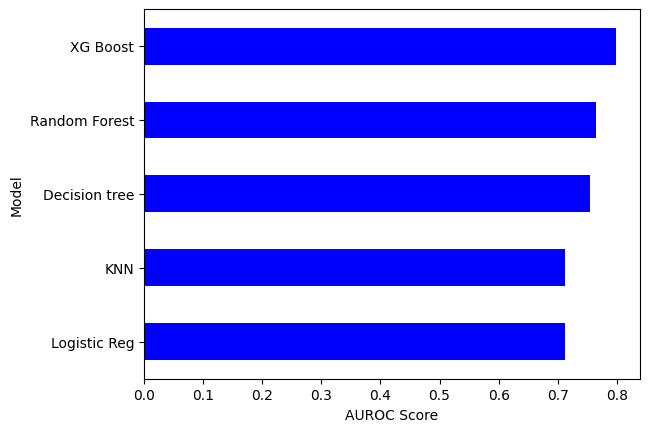

In [240]:
Score_DF.plot(kind='barh',y='AUROC Score',x='Model',color='b')
plt.legend().remove()
plt.xlabel('AUROC Score')

#### From the Above chart it is clear that the best model for this Data is XG Boost with AUROC Score of 0.799

In [230]:
importance = xgb_cl.feature_importances_
Ftr_Importance = pd.DataFrame(list(zip(X_train.columns,importance)),columns=['Feature','Importance'])
Ftr_Importance.sort_values(by = 'Importance',ascending = False)

,Feature,Importance
20,TERTIARY,0.129138
9,BLUE-COLLAR,0.105765
18,SINGLE,0.082821
2,dur,0.073170
19,DIVORCED,0.070165
21,SECONDARY,0.054791
7,TECHNICIAN,0.054120
12,SERVICES,0.053045
22,PRIMARY,0.047305
6,MANAGEMENT,0.040093


#### As mentioned earlier "Call Type" is having very least importance and next to it is "day" Feature.
#### Importance of both the feature is almost "0"
#### Let us re-run the XG-Boost model by removing those Feature

In [237]:
X = X.drop(['Labeled_call_type','day'],axis = 1)
X.head(5)

,age,dur,num_calls,Mon_No,MANAGEMENT,TECHNICIAN,ENTREPRENEUR,BLUE-COLLAR,RETIRED,ADMIN.,...,SELF-EMPLOYED,UNEMPLOYED,HOUSEMAID,STUDENT,MARRIED,SINGLE,DIVORCED,TERTIARY,SECONDARY,PRIMARY
0,58,261,1,5,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,44,151,1,5,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,33,76,1,5,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,47,92,1,5,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,33,198,1,5,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [238]:
# Spliting the Data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 7)

# Balancing the Data

smt = SMOTEENN(sampling_strategy='all')
X_smt, Y_smt = smt.fit_resample(X_train, Y_train)
X.shape,Y.shape,X_smt.shape,Y_smt.shape

#Scaling the data

scaler.fit(X_smt)
X_smt = scaler.transform(X_smt)
X_test = scaler.transform(X_test)

# Training the data using XG-BOOST Model
xgb_cl = xgb.XGBClassifier(learning_rate = Lr, max_depth=RF_Depth,random_state = 1,n_estimators= 100)
xgb_cl.fit(X_smt, Y_smt) # Training

# Predciting & Evaluating the Model

XGB_Pred = xgb_cl.predict(X_test)
XGB_Score = round(roc_auc_score(Y_test, XGB_Pred),3)


0.794

In [239]:
print("The Final AUROC Score for the Model is : ", XGB_Score)

The Final AUROC Score for the Model is :  0.794


## Final Inference:
#### The best model for the given Data Set is XG-Boost Model.
#### "Call Type & Day" Feature are not important
#### The Final AUROC Score attained for the Model is ***"0.794"***